## 归一化

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 最大值最小值归一化（标准化）

In [2]:
#最大值最小值归一化
x_1 = np.random.randint(0,10,size=10) #一维
x_2 = np.random.randint(1000,5000,size=10)一维

x = np.c_[x_1,x_2] #二维
x

array([[   3, 3241],
       [   3, 4056],
       [   4, 3176],
       [   0, 4038],
       [   0, 1916],
       [   0, 2490],
       [   2, 4559],
       [   5, 1081],
       [   5, 1655],
       [   3, 1822]], dtype=int32)

In [3]:
#归一化 axis = 0表示按照行的方向，将每一列进行计算
x_norm = (x - x.min(axis = 0)) / (x.max(axis = 0) - x.min(axis = 0))
x_norm

array([[0.6       , 0.62104658],
       [0.6       , 0.85537665],
       [0.8       , 0.60235768],
       [0.        , 0.85020127],
       [0.        , 0.24008051],
       [0.        , 0.40511788],
       [0.4       , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.16503738],
       [0.6       , 0.21305348]])

In [5]:
#演示离群点 
#在数据处理前，需要清洗离群点
x[6,1] = 123456789
x
x_norm = (x - x.min(axis = 0)) / (x.max(axis = 0) - x.min(axis = 0))
x_norm.round(2)

array([[0.6, 0. ],
       [0.6, 0. ],
       [0.8, 0. ],
       [0. , 0. ],
       [0. , 0. ],
       [0. , 0. ],
       [0.4, 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0. ]])

#### sklearn方法调用

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
mms = MinMaxScaler()
np.set_printoptions(suppress=True)
mms.fit_transform(x)

array([[0.6       , 0.0000175 ],
       [0.6       , 0.0000241 ],
       [0.8       , 0.00001697],
       [0.        , 0.00002395],
       [0.        , 0.00000676],
       [0.        , 0.00001141],
       [0.4       , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.00000465],
       [0.6       , 0.000006  ]])

### 0均值标准化 z-score

In [10]:
import numpy as np
x_1 = np.random.randint(0,10,size=(10,1)) #二维
x_2 = np.random.randint(1000,10000,size=(10,1)) #二维

x = np.c_[x_1,x_2] #二维
x

array([[   9, 3320],
       [   1, 3617],
       [   1, 4011],
       [   8, 2583],
       [   0, 6652],
       [   6, 1728],
       [   9, 4108],
       [   2, 2495],
       [   9, 9779],
       [   6, 8402]], dtype=int32)

In [12]:
norm = (x - x.mean(axis = 0))/ x.std(axis = 0)
norm #归一化结果，正态分布 0,1

array([[ 1.10352808, -0.52777285],
       [-1.16011926, -0.41161981],
       [-1.16011926, -0.25753125],
       [ 0.82057216, -0.81600449],
       [-1.44307518,  0.77533137],
       [ 0.25466033, -1.15038447],
       [ 1.10352808, -0.21959574],
       [-0.87716334, -0.85042021],
       [ 1.10352808,  1.99826261],
       [ 0.25466033,  1.45973485]])

In [15]:
norm.mean(axis = 0) #平均值

array([0., 0.])

In [17]:
norm.std(axis = 0) #标准差

array([1., 1.])

#### sklearn方法调用

In [18]:
from sklearn.preprocessing import StandardScaler
sta = StandardScaler()
sta.fit(x)
x_norm2 = sta.transform(x)
x_norm2

array([[ 1.10352808, -0.52777285],
       [-1.16011926, -0.41161981],
       [-1.16011926, -0.25753125],
       [ 0.82057216, -0.81600449],
       [-1.44307518,  0.77533137],
       [ 0.25466033, -1.15038447],
       [ 1.10352808, -0.21959574],
       [-0.87716334, -0.85042021],
       [ 1.10352808,  1.99826261],
       [ 0.25466033,  1.45973485]])

<img src="./Snipaste_2025-09-13_14-56-27.png" alt="./Snipaste_2025-09-13_14-56-27.png" width="80%" >

## 正则化

In [23]:
import numpy as np
import matplotlib.pyplot as plt

$L_1 = |w_1| + |w_2|$

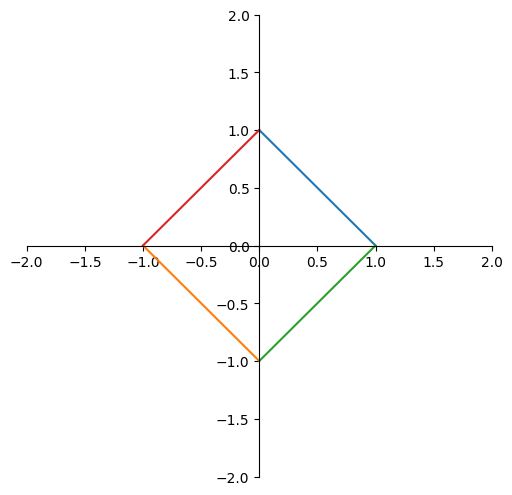

In [40]:
#f(x,y) = |x| + |y|

#|x| + |y| = 0

#假设x,y都是大于零

fun1 = lambda x:1 - x

x1 = np.linspace(0,1,50)
y1 = fun1(x1)
plt.figure(figsize=(6,6))
plt.plot(x1,y1)

plt.xlim(-2,2)
plt.ylim(-2,2)

ax = plt.gca()

ax.spines['right'].set_color('None')
ax.spines['top'].set_color('None')
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))


fun2 = lambda x: -x - 1
x2 = np.linspace(-1,0,50)
y2 = fun2(x2)
plt.plot(x2,y2)

fun3 = lambda x: x - 1
x3 = np.linspace(0,1,50)
y3 = fun3(x3)
plt.plot(x3,y3)


fun4 = lambda x: x + 1
x4 = np.linspace(-1,0,50)
y4 = fun4(x4)
plt.plot(x4,y4)



### L2可视化

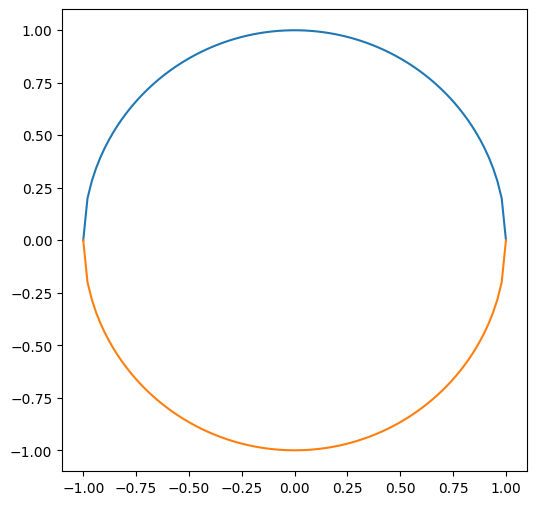

In [45]:
fun = lambda x: (1 - x**2) ** 0.5
x = np.linspace(-1,1,100)
y1 = fun(x)
y2 = -fun(x)
plt.figure(figsize=(6,6))
plt.plot(x,y1)
plt.plot(x,y2)

### Ridge岭回归

In [56]:
from sklearn.linear_model import Ridge,SGDRegressor,LinearRegression

In [49]:
#创建数据
x = 2 * np.random.rand(100,5)
w = np.random.randint(1,10,size=(5,1))
b = np.random.randint(1,10,size=1)

y= x.dot(w) + b + np.random.randn(100,1)
display(x.shape,y.shape)

(100, 5)

(100, 1)

In [50]:
ridge = Ridge(alpha=1,solver='sag')
ridge.fit(x,y)
print(ridge.coef_)
print(ridge.intercept_)

[5.70054892 7.48410117 1.91719128 1.1822051  2.16868727]
[8.54690193]


In [53]:
print('真实参数值:',w,b)

真实参数值: [[6]
 [8]
 [2]
 [1]
 [2]] [8]


In [55]:
sgd = SGDRegressor(penalty='l2',alpha=0)
sgd.fit(x,y)
print(sgd.coef_)
print(sgd.intercept_)

[6.12432683 8.06499164 2.5442885  1.93506523 2.5736649 ]
[5.68285011]


D:\AI\pytroch_learning\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
model = LinearRegression()
model.fit(x,y)
print(model.coef_)
print(model.intercept_)

[[5.86620003 7.75776063 2.00205097 1.30524139 2.24734191]]
[7.82140168]


### Lasso回归 套索回归

In [63]:
from sklearn.linear_model import Lasso,SGDRegressor,LinearRegression

In [62]:
#创建数据
x = 2 * np.random.rand(100,20)
w = np.random.rand(20,1)
b = np.random.randint(1,10,size=1)

y= x.dot(w) + b + np.random.randn(100,1)
display(x.shape,y.shape)

(100, 20)

(100, 1)

In [66]:
lasso = Lasso(alpha=0.1)
lasso.fit(x,y)
print(lasso.coef_)
print(lasso.intercept_)

[-0.          0.33926927  0.78864535  0.73835104  0.19906902  0.
  0.06006781  0.10277683  0.47756413  0.06154598  0.31716513  0.56294222
  0.20795925  0.          0.20349773  0.30440516  0.61058725  0.
  0.          0.        ]
[9.41645315]


In [112]:
#随即梯度下降
sgd = SGDRegressor(penalty='l1',alpha=0)
#sgd.fit(x,y.reshape(-1)) 变成一维
sgd.fit(x,y.ravel())
print(sgd.coef_)
print(sgd.intercept_)

[0.17702459 0.59798517 1.05990531 1.05975654 0.49447986 0.36411543
 0.58815733 0.78324901 1.00440274 0.71584926 0.88315136 1.02134386
 0.68607028 0.28528232 0.83479963 0.67387032 0.67546958 0.46514477
 0.29356732 0.65188275]
[0.99506685]


### ElasticNet 弹性网络

In [113]:
from sklearn.linear_model import ElasticNet,SGDRegressor,LinearRegression

In [114]:
#创建数据
x = 2 * np.random.rand(100,20)
w = np.random.rand(20,1)
b = np.random.randint(1,10,size=1)

y= x.dot(w) + b + np.random.randn(100,1)
display(x.shape,y.shape)

(100, 20)

(100, 1)

In [117]:
elasticNet = ElasticNet(alpha=0.5,l1_ratio=0.4)
elasticNet.fit(x,y)
print(elasticNet.coef_)
print(elasticNet.intercept_)

[-0.          0.02837128  0.10466916  0.055856    0.29177161  0.
  0.37031104  0.24453424  0.          0.          0.          0.03926622
 -0.          0.          0.          0.07760084  0.42654158  0.00508411
  0.          0.        ]
[11.2726613]


In [118]:
#随即梯度下降
sgd = SGDRegressor(penalty='l1',alpha=0)
#sgd.fit(x,y.reshape(-1)) 变成一维
sgd.fit(x,y.ravel())
print(sgd.coef_)
print(sgd.intercept_)

[0.2501341  0.67820719 0.67887895 0.67552279 0.72030775 0.27612377
 1.05572013 0.82863594 0.55410139 0.53420866 0.70941275 0.61431989
 0.10646    0.55742007 0.4527367  0.78192832 0.94512579 0.38194777
 0.61172259 0.64214292]
[0.67666224]
